In [1]:
from os.path import isfile
import menpo.io as mio
#from menpodetect.ffld2 import load_ffld2_frontal_face_detector
import menpodetect.ffld2 as ff
#from menpodetect.dlib import load_dlib_frontal_face_detector
from dlib import shape_predictor
from IPython.display import Image
import matplotlib.pyplot as plt

try:
    %matplotlib inline
    from menpowidgets import visualize_images
except NameError:
    # e.g. if you are in a terminal
    pass

# decide which detector to use: 
detector = ff.load_ffld2_frontal_face_detector()
#detector = load_dlib_frontal_face_detector()

# path to export the cropped frames to
p_out = './cropped_frames'

# base path of the landmark localisation model:
# e.g. if you use the dlib detector, you can
# download the following landmark localisation 
# model: 
# https://github.com/davisking/dlib-models
p_sp = './shape_predictor_68_face_landmarks.dat'
assert(isfile(p_sp))
model = shape_predictor(p_sp)




In [2]:

#video name (and path if it is not in source folder)
video='video.mp4'

# import the video
ims = mio.import_video(video)



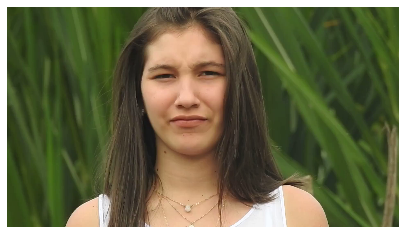

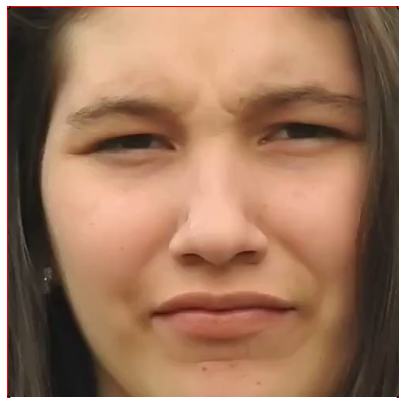

In [3]:
# In case you have the frames, this should work by 
# replacing the 'import_video' with 'import_images' 
# in the appropriate paths.
# process all frames iteratively.
show_image = True
for cnt, im in enumerate(ims):
    
    frame_cnt = '{0:06d}'.format(cnt)
    #Detection -> pointgraph object (or list of pointgraph objects if multiple faces)
    lns = detector(im)

    if len(lns) > 0:
        cropped = im.crop_to_pointcloud(lns[0],0)
        
        if show_image:
            #display(Image(im),Image(cropped))
            im.view()
            visualize_images(cropped)
            show_image = False
       
        # export to path with name = frame number (e.g. 000020.png for frame 20)
        mio.export_image(cropped,p_out+'/'+frame_cnt+'.png')
    